**Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.**


Min-Max scaling is a data preprocessing technique that transforms numerical features to a common scale, usually between 0 and 1. It is also known as normalization. It is useful for algorithms that are sensitive to the magnitude or range of the features, such as gradient descent, k-nearest neighbors, or linear and logistic regression.

The formula for Min-Max scaling is:

$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

where $x$ is the original feature value, $x_{min}$ and $x_{max}$ are the minimum and maximum values of the feature, and $x_{scaled}$ is the scaled feature value.

To illustrate how Min-Max scaling works, let us consider an example. Suppose we have a dataset of house prices with two features: area (in square feet) and number of bedrooms. The dataset is stored in a CSV file called `house_dataset.csv`.

`We can use Python and pandas to load the data into a dataframe:`

In [1]:
# Import pandas library
import pandas as pd
import numpy as np

# Load the data from CSV file
df = pd.read_csv('datasets/house_dataset.csv')

# Print the first five rows of the data
print(df.head())
print("\t")

# Select the columns area, bedrooms and price from the dataframe df
df_new = df [ ['area', 'bedrooms', 'price']]

# Print the new dataframe
print(df_new.head())
print("\t")

# print the range of the values for the area and bedrooms columns
print("area_range:", np.ptp(df_new['area']))
print("bedrooms_range:", np.ptp(df_new['bedrooms']))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
	
   area  bedrooms     price
0  7420         4  13300000
1  8960         4  12250000
2  9960      

We can see that the features have different scales and ranges. The area range is 14550, while the bedrooms range is 5. This can cause problems for some algorithms that rely on the distance or similarity between the features. For example, if we use the Euclidean distance to measure the difference between two houses, the area feature will dominate the distance because it has a larger scale than the bedrooms feature. This can lead to biased or inaccurate results.

To solve this problem, we can apply Min-Max scaling to each feature. We can use the `MinMaxScaler` class from the `sklearn.preprocessing` module to do this. The `MinMaxScaler` class has a `fit_transform` method that takes a dataframe or a numpy array as input and returns a scaled dataframe or array. The `fit_transform` method also computes the minimum and maximum values of each feature and stores them in the `data_min_` and `data_max_` attributes of the scaler object. We can use these attributes later to inverse the scaling if needed.

`Here is how we can use the `MinMaxScaler` class to scale our data:`

In [2]:
# Import MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_df = scaler.fit_transform(df_new)

# Convert the scaled array to a dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df_new.columns)

# Print the first five rows of the scaled data
print(scaled_df.head())

       area  bedrooms     price
0  0.396564       0.6  1.000000
1  0.502405       0.6  0.909091
2  0.571134       0.4  0.909091
3  0.402062       0.6  0.906061
4  0.396564       0.6  0.836364


We can see that the scaled data has values between 0 and 1 for each feature. The minimum value of each feature is mapped to 0, and the maximum value is mapped to 1. The relative order and proportion of the values are preserved. For example, the house with the largest area and the most bedrooms has the highest price, and the house with the smallest area and the fewest bedrooms has the lowest price.

We can also visualize the effect of Min-Max scaling on the data using matplotlib. We can plot the original and the scaled data on scatter plots and compare them. Here is how we can do that:

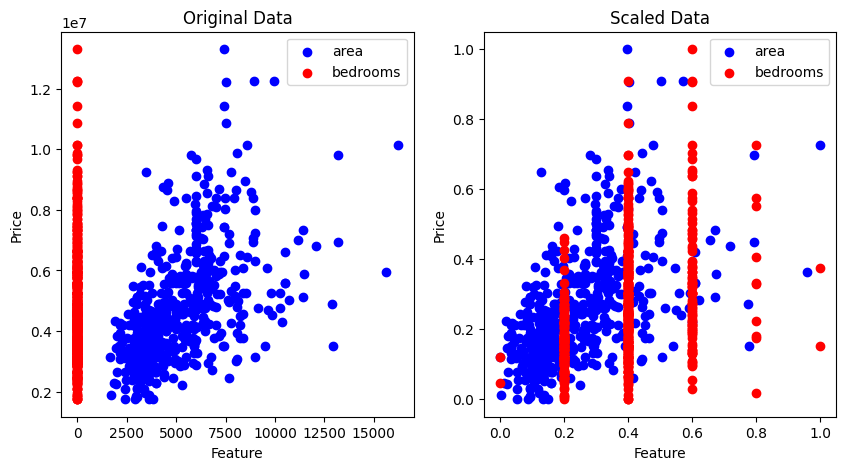

In [3]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data on the first subplot
ax1.scatter(df_new['area'], df_new['price'], color='blue', label='area')
ax1.scatter(df_new['bedrooms'], df_new['price'], color='red', label='bedrooms')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Price')
ax1.set_title('Original Data')
ax1.legend()

# Plot the scaled data on the second subplot
ax2.scatter(scaled_df['area'], scaled_df['price'], color='blue', label='area')
ax2.scatter(scaled_df['bedrooms'], scaled_df['price'], color='red', label='bedrooms')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Price')
ax2.set_title('Scaled Data')
ax2.legend()

# Show the figure
plt.show()

We can see that the scaled data has a smaller range and a more uniform distribution than the original data. The features are more comparable and balanced in terms of scale and magnitude. This can help improve the performance and accuracy of some machine learning algorithms.

**Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.**

The unit vector technique is based on the concept of a unit vector, which is a vector that has a magnitude (or length) of 1. A unit vector can be obtained by dividing any non-zero vector by its magnitude. The magnitude of a vector $\vec{v}$ is denoted by $||\vec{v}||$ and is calculated by taking the square root of the sum of the squares of its components. For example, if $\vec{v} = (v_1, v_2, ..., v_n)$, then $||\vec{v}|| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2}$.

To apply the unit vector technique to a dataset, we treat each data point as a vector and divide it by its magnitude to get a normalized data point. For example, if $\vec{x} = (x_1, x_2, ..., x_n)$ is a data point, then the normalized data point is $\vec{x}_{norm} = \frac{\vec{x}}{||\vec{x}||} = (\frac{x_1}{||\vec{x}||}, \frac{x_2}{||\vec{x}||}, ..., \frac{x_n}{||\vec{x}||})$. We repeat this process for all the data points in the dataset and get a normalized dataset.

- The unit vector technique is a way of transforming a dataset's features into a uniform scale where each data point has the same magnitude (or length) of 1, but different directions. 
- This means that the normalized data points are proportional to the original data points, but have different scales. 
- The unit vector technique can be useful when the direction of the data is more important than the magnitude, or when the features have different units and scales. 
- However, the unit vector technique can also distort the shape of the distribution and the relative relationship between values.

To apply the unit vector technique to a dataset, we need to calculate the Euclidean norm of each data point, which is the square root of the sum of the squares of the feature values. For example, if $\vec{x} = (x_1, x_2, ..., x_n)$ is a data point, then the norm of $\vec{x}$ is $||\vec{x}|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$. Then, we divide each feature value by the norm to get the normalized value. For example, the normalized value of $x_1$ for the data point $\vec{x}$ is $\frac{x_1}{||\vec{x}||}$. We repeat this process for all the data points and get a normalized dataset.

To normalize each column separately, we can use the Normalizer class from sklearn.preprocessing, but we need to specify the parameter `norm='l1'` or `norm='l2'`. The default parameter is `norm='l2'`, which normalizes each row. The parameter `norm='l1'` or `norm='l2'` normalizes each column using the L1 or L2 norm, respectively. The L1 norm is the sum of the absolute values of the feature values, and the L2 norm is the square root of the sum of the squares of the feature values.

To plot the original and normalized datasets using matplotlib, we can use the `scatter()` function, which creates a scatter plot of x and y coordinates. We can also use the `quiver()` function, which creates a vector field plot of x and y coordinates and u and v components. The u and v components represent the `horizontal` and `vertical` direction of the vectors, respectively.

`The code and the plots are shown below:`

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
	
   area  bedrooms     price
0  7420         4  13300000
1  8960         4  12250000
2  9960      

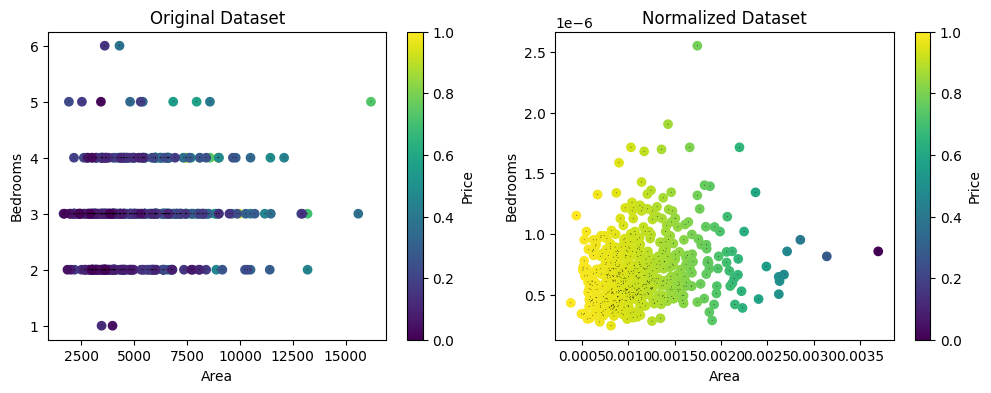

In [4]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.preprocessing import Normalizer, normalize
# Import matplotlib library
import matplotlib.pyplot as plt
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.preprocessing import Normalizer

# Load the data from CSV file
df = pd.read_csv('datasets/house_dataset.csv')

# Print the first five rows of the data
print(df.head())
print("\t")

# Select the columns area, bedrooms and price from the dataframe df
df_new = df [ ['area', 'bedrooms', 'price']]

# Print the new dataframe
print(df_new.head())
print("\t")

# Create a Normalizer instance with norm='l2'
normalizer = Normalizer(norm='l2')

# Normalize each row using unit vector
normalized_array = normalizer.fit_transform(df_new)

# Convert the normalized array to a dataframe
normalized_df = pd.DataFrame(normalized_array, columns=df_new.columns)

# Print the normalized dataframe
print("Normalized dataframe:")
print(normalized_df.head())
print("\t")

# Assign the values of x, y, z, x_norm, y_norm and z_norm variables
# Use the .values attribute to get numpy arrays from dataframes
x = df_new["area"].values
y = df_new["bedrooms"].values
z = df_new["price"].values
x_norm = normalized_df["area"].values
y_norm = normalized_df["bedrooms"].values
z_norm = normalized_df["price"].values

# Plot original and normalized datasets
plt.figure(figsize=(12, 4))

# Plot original dataset
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=z, cmap="viridis")
plt.quiver(x, y, x, y, color="black", scale=1e8)
plt.title("Original Dataset")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.colorbar(label="Price")

# Plot normalized dataset
plt.subplot(1, 2, 2)
plt.scatter(x_norm, y_norm, c=z_norm, cmap="viridis")
plt.quiver(x_norm, y_norm, x_norm, y_norm, color="black", scale=1)
plt.title("Normalized Dataset")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.colorbar(label="Price")

# Show plots
plt.show()

- The default parameter is norm=‘l2’, which normalizes each row to have a unit norm. This means that the sum of the squares of the values in each row is 1. However, this is not what I want, because it distorts the scale and shape of the data. I want to normalize each column to have a unit norm, which means that the sum of the squares of the values in each column is 1.
- To normalize each column to have a unit norm, I need to transpose the dataframe before and after applying the Normalizer, using the .T attribute. This is because the .T attribute swaps the rows and columns of the dataframe, so that the columns become rows and the rows become columns. By transposing the dataframe before applying the Normalizer, I make the columns into rows, so that the Normalizer can normalize them by columns. By transposing the dataframe again after applying the Normalizer, I make the rows into columns, so that I get the normalized columns back.

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
	
   area  bedrooms     price
0  7420         4  13300000
1  8960         4  12250000
2  9960      

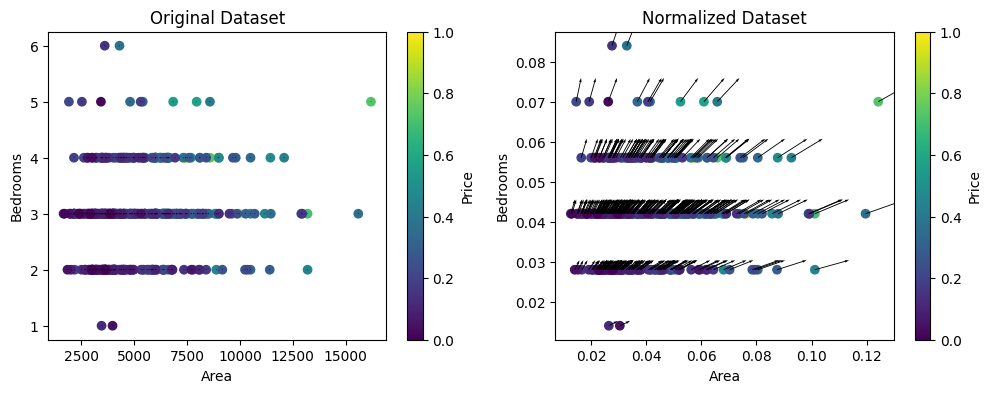

In [5]:
# Import pandas and sklearn libraries
import pandas as pd
from sklearn.preprocessing import Normalizer # No need for alias
# Import matplotlib library
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv('datasets/house_dataset.csv')

# Print the first five rows of the data
print(df.head())
print("\t")

# Select the columns area, bedrooms and price from the dataframe df
df_new = df [ ['area', 'bedrooms', 'price']]

# Print the new dataframe
print(df_new.head())
print("\t")

# Create a Normalizer instance with norm='l2'
normalizer = Normalizer(norm='l2')

# Normalize each column using unit vector
# Transpose the dataframe before and after applying the Normalizer
normalized_array = normalizer.fit_transform(df_new.T).T

# Convert the normalized array to a dataframe
normalized_df = pd.DataFrame(normalized_array, columns=df_new.columns)

# Print the normalized dataframe
print("Normalized dataframe:")
print(normalized_df.head())
print("\t")

# Assign the values of x, y, z, x_norm, y_norm and z_norm variables
# Use the .values attribute to get numpy arrays from dataframes
x = df_new["area"].values
y = df_new["bedrooms"].values
z = df_new["price"].values
x_norm = normalized_df["area"].values
y_norm = normalized_df["bedrooms"].values
z_norm = normalized_df["price"].values

# Plot original and normalized datasets
plt.figure(figsize=(12, 4))

# Plot original dataset
plt.subplot(1, 2, 1)
plt.scatter(x, y, c=z, cmap="viridis")
plt.quiver(x, y, x, y, color="black", scale=1e8)
plt.title("Original Dataset")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.colorbar(label="Price")

# Plot normalized dataset
plt.subplot(1, 2, 2)
plt.scatter(x_norm, y_norm, c=z_norm, cmap="viridis")
plt.quiver(x_norm, y_norm, x_norm, y_norm, color="black", scale=1)
plt.title("Normalized Dataset")
plt.xlabel("Area")
plt.ylabel("Bedrooms")
plt.colorbar(label="Price")

# Show plots
plt.show()


We can see that the unit vector technique changes the scale and the shape of the distribution of the data points, but preserves the direction of the vectors. The normalized data points have the same magnitude of 1, but different coordinates. The color of the data points represents the price feature, which is also normalized.

**Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.**

1. **Importing Libraries:** 

This code imports the necessary Python libraries, including pandas for data handling, numpy for numerical operations, matplotlib for plotting, and specific modules from scikit-learn for working with the Iris dataset and performing PCA.

In [6]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. **Loading and Exploring the Dataset:**

Here, the Iris dataset is loaded, and a Pandas DataFrame is created with the feature names as column headers. It also adds a "species" column with the categorical species labels. The code then prints the first five rows of the dataset and summary statistics.

In [7]:
# Load the iris dataset as a pandas dataframe
iris = load_iris() # Load the iris dataset from sklearn
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Create a dataframe with the feature names as columns
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Add a column for the species labels
print("The Original Dataframe:")
print(df.head()) # Print the first five rows of the dataframe
print("Summary Statistics Of The Dataframe:")
print(df.describe()) # Print the summary statistics of the dataframe

The Original Dataframe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Summary Statistics Of The Dataframe:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50

3. **Standardize the Data:**

In PCA, the first thing we do is make sure our data is prepared properly. Standardization is the process of transforming the data so that it has a mean (average) of 0 and a standard deviation of 1. This step is crucial because it ensures that all features (or variables) are on the same scale.We do this to avoid one variable dominating another just because it has larger values. Let's take the Iris dataset as an example:

The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three different species of Iris flowers. Each of these measurements can have different ranges. For instance, sepal length might range from 4.0 to 7.9 centimeters, while sepal width might range from 2.0 to 4.4 centimeters.

Standardizing means we subtract the mean (average) and divide by the standard deviation for each feature (in this case, sepal length, sepal width, petal length, and petal width). This makes all features have a mean of 0 and a standard deviation of 1.

Imagine we have measurements of sepal length and sepal width of flowers in centimeters. The sepal length values may range from, say, 4 to 8 cm, and the sepal width values may range from 2 to 5 cm. Standardization transforms these values into a common scale so that they are easier to compare.

For each data point (observation) in our dataset, we calculate the standardized value like this:

$$X_{\text{standardized}} = \frac{X - \mu}{\sigma}$$

- $X_{\text{standardized}}$ is the new standardized value of the data point.
- $X$ is the original value.
- $\mu$ is the mean of all the data points for that feature.
- $\sigma$ is the standard deviation of all the data points for that feature.

For example, if the mean sepal length is 5.8 cm and its standard deviation is 0.8 cm, we standardize it like this:

$$\text{Standardized Sepal Length} = \frac{\text{Sepal Length} - 5.8}{0.8}$$

We do this for all features, so they are all on the same scale.

In [8]:
# Standardize the data using the StandardScaler class from sklearn.preprocessing
scaler = StandardScaler() # Create an instance of the StandardScaler class
scaler.fit(df.iloc[:, 0:4]) # Fit the scaler to the first four columns of the dataframe, which are the features
X = scaler.transform(df.iloc[:, 0:4]) # Transform the features using the scaler and store them in a numpy array

4. **Apply PCA**

PCA helps us find new directions (called principal components) in our data that capture the most important information. It does this by analyzing how different features are related to each other. These new directions are a bit like "super features" that are a combination of the original features.

Imagine you have data points in two dimensions (X and Y). PCA tries to find a new coordinate system where the first axis (PC1) points in the direction of the most significant variation in your data, and the second axis (PC2) points in the direction of the second most significant variation.

To do this, PCA solves an equation:

$$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

- $\Sigma$ is a matrix that describes how the features are related (the covariance matrix).
- $\mathbf{v}$ is a vector that defines a principal component.
- $\lambda$ is a number (eigenvalue) that tells us how important that principal component is.

The `first principal component (PC1)` corresponds to the direction with the `highest eigenvalue`, which means it captures the most variance in the data. The `second principal component (PC2)` corresponds to the `second-highest eigenvalue`, and so on. PCA is like a magical tool that helps us understand which features are the most important in our data. It does this by finding new directions (principal components) that capture the most variation in the data.

In the Iris dataset, PCA helps us understand which combination of sepal length, sepal width, petal length, and petal width is most important. These new directions are like "super features" made up of the original features.

Let's say we find two principal components, PC1 and PC2. PC1 might be a combination of sepal length, sepal width, and a little bit of petal length, while PC2 might be a combination of sepal length and petal width.

These principal components are chosen in a way that PC1 explains the most variation in the data, and PC2 explains the second most variation. We get this information by solving some math equations. The eigenvalue of each principal component tells us how important it is, and the eigenvector gives us the direction.

In [9]:
# Apply PCA using the PCA class from sklearn.decomposition and fit it to the standardized data
pca = PCA() # Create an instance of the PCA class
pca.fit(X) # Fit the PCA model to the standardized data
print("Eigen Values Of The PCA Model:")
print(pca.explained_variance_) # Print the eigenvalues of the PCA model
print("Eigen Vectors Of The PCA Model:")
print(pca.components_) # Print the eigenvectors of the PCA model
print("Explained Variance Ratio Of The PCA Model:")
print(pca.explained_variance_ratio_) # Print the explained variance ratio of the PCA model


Eigen Values Of The PCA Model:
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigen Vectors Of The PCA Model:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Explained Variance Ratio Of The PCA Model:
[0.72962445 0.22850762 0.03668922 0.00517871]


5. **Determine the Number of Principal Components to Keep**

PCA might give us many principal components, but we don't need all of them. We want to keep the most important ones. To decide how many to keep, we look at the cumulative explained variance.

The cumulative explained variance tells us how much of the total variance in the data is explained by the first \(d\) principal components. We want to keep enough principal components to explain a large portion of the variance, like 95%.

$$C_d = \frac{\sum_{i=1}^{d} \lambda_i}{\sum_{i=1}^{N} \lambda_i}$$

- $C_d$ is the cumulative explained variance for \(d\) components.
- $\lambda_i$ is the eigenvalue for each principal component.
- $N$ is the total number of eigenvalues.

We choose $d$ such that $C_d$ is at least 0.95, meaning we're retaining enough information. That means, we might decide to keep the first two principal components if they explain at least 95% of the variation in the data. 

This is like saying, "We're only going to pay attention to the most important features."

In [10]:
# Choose the number of principal components to keep based on the percentage of explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_) # Compute the cumulative sum of the explained variance ratio
d = np.argmax(cumsum >= 0.95) + 1 # Find the index where the cumulative sum is greater than or equal to 0.95, and add 1 to get the number of principal components
print("Number of Principal Components:", d) # Print the number of principal components

Number of Principal Components: 2


6. **Transform Data**

Once we know which principal components to keep (let's say PC1 and PC2), we can transform our data into a new coordinate system using these components. This transformation reduces the number of features, but the new features (PC1 and PC2) are the most important ones. Once we know which principal components to keep (for example, the first two), we can transform our data into a new coordinate system using these principal components.

$$Z = X \cdot V$$

- $Z$ is the transformed data.
- $X$ is the standardized data.
- $V$ is a matrix containing the selected principal components as columns.

This transformation reduces the dimensionality of our data while retaining the most important information. So, instead of working with sepal length, sepal width, petal length, and petal width, we now work with PC1 and PC2, which are combinations of the original features. This makes our analysis simpler and helps us see patterns more easily.

In [11]:
# Transform the data to the new coordinate system using the transform method of the PCA model
Z = pca.transform(X) # Transform the standardized data using the PCA model and store them in a numpy array
#print(Z) # Print the transformed data

7. **Visualize the Results**

In the code, we see two plots:

1. The first plot shows the original data points, which are the measurements of sepal length and sepal width. It also shows arrows that represent the directions of the first two principal components (PC1 and PC2). These arrows help us see how the data is oriented in the new coordinate system.

2. The second plot shows the transformed data in the new coordinate system (PC1 and PC2). Each point in this plot represents a flower, and its position is determined by its values along PC1 and PC2. This plot makes it easier to see how different types of Iris flowers are distributed based on these new features.

These plots help us visualize how PCA has transformed our data and how it's easier to separate the different types of flowers based on these new "super features."

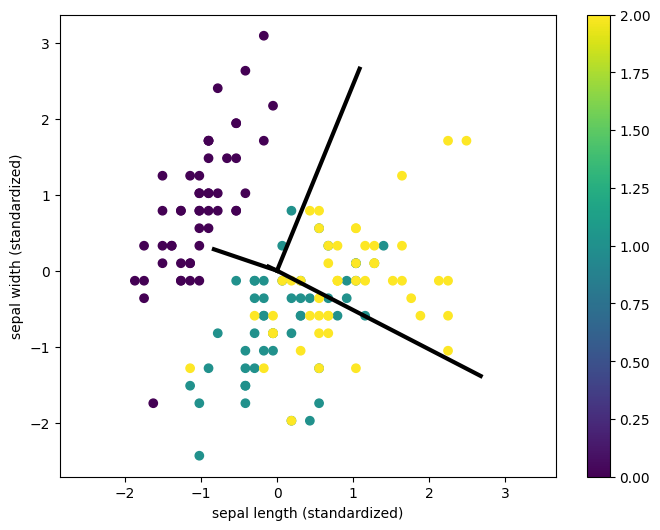

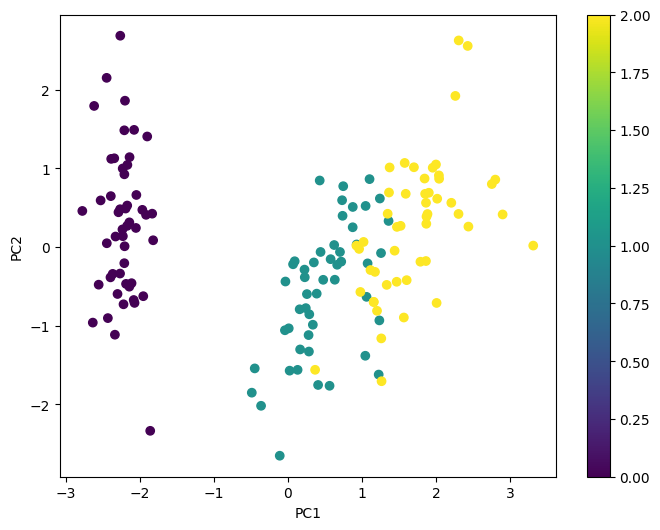

In [12]:
# Plot the original data and the principal components as vectors on the same scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create another figure with a specified size
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis') # Plot the first two columns of the original data as a scatter plot, using the iris target as the color and the viridis colormap
plt.xlabel('sepal length (standardized)') # Label the x-axis as sepal length (standardized)
plt.ylabel('sepal width (standardized)') # Label the y-axis as sepal width (standardized)
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
for length, vector in zip(pca.explained_variance_, pca.components_): # Loop over the eigenvalues and eigenvectors of the PCA model
    v = vector * 3 * np.sqrt(length) # Scale the eigenvector by 3 times the square root of the eigenvalue
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3) # Plot the eigenvector as a black line with a specified width
plt.axis('equal') # Set the axis to be equal
plt.show() # Show the plot

# Plot the transformed data as a scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create a figure with a specified size
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target, cmap='viridis') # Plot the first two columns of the transformed data as a scatter plot, using the iris target as the color and the viridis colormap
plt.xlabel('PC1') # Label the x-axis as PC1
plt.ylabel('PC2') # Label the y-axis as PC2
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
plt.show() # Show the plot

8. **Optional Step:**

To determine which combination of features contribute to the principal components (eigen vectors), we can inspect the `pca.components_` attribute. Each row in this matrix represents an eigen vector, and the elements within each row indicate the weights (loadings) of each feature on that principal component.

`Here's how we can modify our code to print the combination of features for the first two principal components (PC1 and PC2):`

This code will print the feature names along with their corresponding weights for PC1 and PC2. The weights can be positive or negative, and their magnitudes indicate the importance of each feature in defining the corresponding principal component. Positive weights suggest a positive correlation with the component, while negative weights suggest a negative correlation.

In [13]:
# Print the eigen vectors of the PCA model
print("Eigen Vectors Of The PCA Model:")
print(pca.components_)

# Get the feature names
feature_names = df.columns[:-1]  # Exclude the 'species' column

# Print the combination of features for PC1 and PC2
for i, component in enumerate(pca.components_[:2]):  # Consider the first two principal components (PC1 and PC2)
    print(f"Principal Component {i+1}:")
    for j, feature_weight in enumerate(component):
        print(f"Feature: {feature_names[j]}, Weight: {feature_weight}")

Eigen Vectors Of The PCA Model:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
Principal Component 1:
Feature: sepal length (cm), Weight: 0.5210659146701196
Feature: sepal width (cm), Weight: -0.26934744250594345
Feature: petal length (cm), Weight: 0.5804130957962946
Feature: petal width (cm), Weight: 0.5648565357793611
Principal Component 2:
Feature: sepal length (cm), Weight: 0.3774176155645672
Feature: sepal width (cm), Weight: 0.9232956595407149
Feature: petal length (cm), Weight: 0.024491609085586785
Feature: petal width (cm), Weight: 0.06694198696805831


**Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.**

PCA (Principal Component Analysis) is a technique used in feature extraction, dimensionality reduction, and data visualization. It's commonly applied to high-dimensional datasets to reduce the number of features (dimensions) while preserving the essential information. PCA identifies the most important patterns in the data and represents them using a smaller number of new features called principal components.

Here's a step-by-step explanation and example of how PCA can be used for feature extraction, including Python code with comments and visualizations:

**Step 1: Load the Data**

In [14]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# Load the iris dataset as a pandas dataframe
iris = load_iris() # Load the iris dataset from sklearn
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Create a dataframe with the feature names as columns
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Add a column for the species labels
print("The Original Dataframe:")
print(df.head()) # Print the first five rows of the dataframe
print("Summary Statistics Of The Dataframe:")
print(df.describe()) # Print the summary statistics of the dataframe

The Original Dataframe:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Summary Statistics Of The Dataframe:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50

**Step 2: Standardize the Data**

PCA is sensitive to the scale of the data, so it's essential to standardize it (mean = 0, variance = 1) before applying PCA.

In [15]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(df.iloc[:, 0:4])

**Step 3: Calculate the Covariance Matrix**

PCA works by finding the eigenvectors of the covariance matrix of the standardized data.

In [16]:
# Calculate the covariance matrix
cov_matrix = np.cov(data_std, rowvar=False)
print("The Covariance Matrix:")
print(cov_matrix)

The Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


**Step 4: Compute Eigenvectors and Eigenvalues**

Now, we need to compute the eigenvectors and eigenvalues of the covariance matrix. These will represent the principal components and their importance.

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigen_Values:", eigenvalues)
print("Eigen_Vectors:", eigenvectors)

Eigen_Values: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen_Vectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Step 5: Sort Eigenvalues**

Sort the eigenvalues in descending order and keep track of their corresponding eigenvectors. We'll use these sorted eigenvectors as the principal components.

In [18]:
eigenvalue_eigenvector_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_eigenvector_pairs.sort(reverse=True, key=lambda x: x[0])

# Extract the sorted eigenvalues and eigenvectors
sorted_eigenvalues = np.array([pair[0] for pair in eigenvalue_eigenvector_pairs])
sorted_eigenvectors = np.array([pair[1] for pair in eigenvalue_eigenvector_pairs])
print("Eigen_Values_Sorted:")
print(sorted_eigenvalues)
print("Eigen_Vectors_Sorted:")
print(sorted_eigenvectors)

Eigen_Values_Sorted:
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigen_Vectors_Sorted:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]


**Step 6: Choose the Number of Principal Components**

To reduce dimensionality, you need to decide how many principal components to keep. You can use the cumulative explained variance to make this decision.

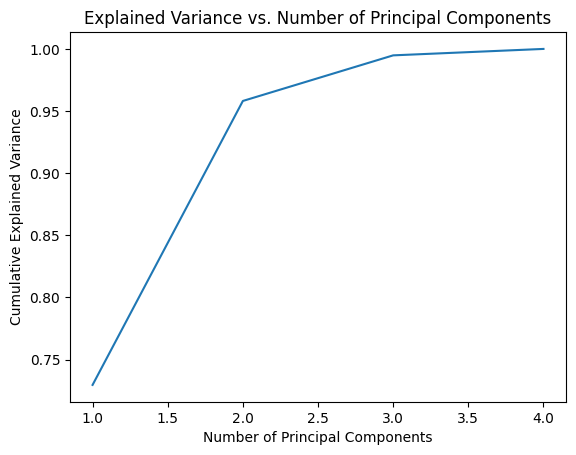

In [19]:
total_variance = sum(eigenvalues)
explained_variance = [eigenvalue / total_variance for eigenvalue in eigenvalues]
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

**Step 7: Select the Number of Principal Components**

Choose a suitable number of principal components that capture most of the variance. In this example, let's say we choose 2 components to retain about 95% of the variance.

In [20]:
num_components = 2

**Step 8: Project Data onto Principal Components**

Project the standardized data onto the selected principal components.

In [21]:
projection_matrix = sorted_eigenvectors[:num_components]
data_pca = data_std.dot(projection_matrix.T)

**Step 9: Visualize the Reduced Data**

Now that we have reduced the data to two dimensions, we can plot it for visualization.

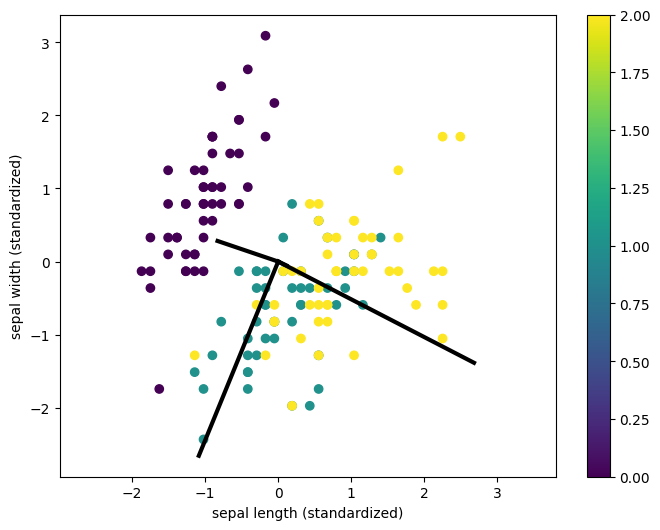

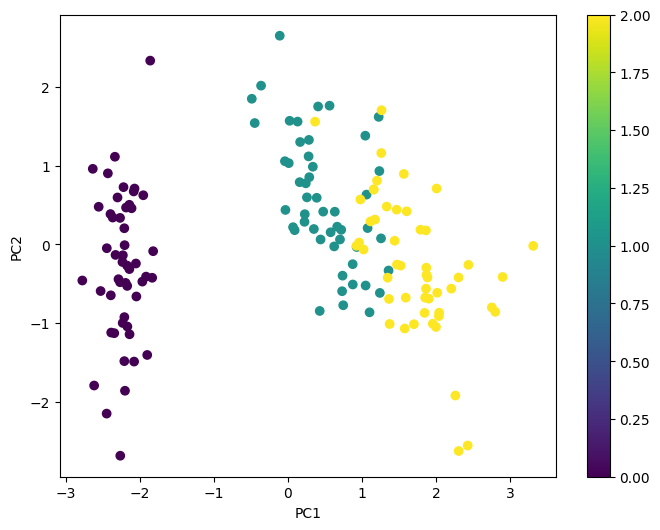

In [22]:
# Plot the original data and the principal components as vectors on the same scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create another figure with a specified size
plt.scatter(data_std[:, 0], data_std[:, 1], c=iris.target, cmap='viridis') # Plot the first two columns of the original data as a scatter plot, using the iris target as the color and the viridis colormap
plt.xlabel('sepal length (standardized)') # Label the x-axis as sepal length (standardized)
plt.ylabel('sepal width (standardized)') # Label the y-axis as sepal width (standardized)
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
for length, vector in zip(sorted_eigenvalues, sorted_eigenvectors): # Loop over the eigenvalues and eigenvectors of the PCA model
    v = vector * 3 * np.sqrt(length) # Scale the eigenvector by 3 times the square root of the eigenvalue
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3) # Plot the eigenvector as a black line with a specified width
plt.axis('equal') # Set the axis to be equal
plt.show() # Show the plot

# Plot the transformed data as a scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create a figure with a specified size
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=iris.target, cmap='viridis') # Plot the first two columns of the transformed data as a scatter plot, using the iris target as the color and the viridis colormap
plt.xlabel('PC1') # Label the x-axis as PC1
plt.ylabel('PC2') # Label the y-axis as PC2
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
plt.show() # Show the plot

In this example, we've effectively reduced the dimensionality of the data while preserving most of the variance by using PCA for feature extraction. The resulting data can be used for various purposes, such as clustering, classification, or visualization.

Remember that the number of principal components to retain can be adjusted based on your specific needs and the amount of variance you want to preserve.

**Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.**

Sure, I can explain how to use Min-Max scaling to preprocess data for a recommendation system in a step-by-step manner, and I'll provide a Python example with comments and visualization using a .csv file. First, let's assume we have a dataset with features like "price," "rating," and "delivery time."

1. **Load the dataset**: First, we need to load our data from a .csv file into a Pandas DataFrame. I'll assume we have a file called `food_data.csv` with the following content:

```csv

food_item,price,rating,delivery_time
Pizza,12.99,4.5,30
Burger,7.99,3.8,20
Sushi,22.99,4.2,45
Salad,9.99,4.9,15
```

`Let's load this data:`

In [23]:
import pandas as pd
   
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('datasets/food_data.csv')
print(df)

         food_item  price  rating  delivery_time
0            Pizza  12.99     4.5             30
1           Burger   7.99     3.8             20
2            Sushi  22.99     4.2             45
3            Salad   9.99     4.9             15
4            Pasta  14.99     3.6             35
5             Taco   8.49     4.1             25
6    Chicken Wings  10.99     4.3             30
7            Steak  18.99     4.6             40
8         Sandwich   6.99     3.9             15
9       Sushi Roll  23.99     4.7             50
10         Burrito   9.49     4.0             20
11            Soup   5.99     4.4             10
12        Pancakes  11.49     4.5             25
13       Ice Cream   3.99     4.8             15
14            Soda   1.99     3.4              5
15         Hot Dog   4.99     3.7             12
16   Fried Chicken  13.99     4.0             30
17  Fish and Chips  15.49     4.2             35
18       Spaghetti  12.49     4.6             40
19   Tofu Stir Fry  

2. **Define the Min-Max Scaling function**: Min-Max scaling transforms our features to a specific range, typically between 0 and 1. The formula for Min-Max scaling is:

$$X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

`Here's a Python function to perform Min-Max scaling:`

In [24]:
def min_max_scaling(data, feature_name):
    max_value = data[feature_name].max()
    min_value = data[feature_name].min()
    scaled_feature = (data[feature_name] - min_value) / (max_value - min_value)
    return scaled_feature

3. **Apply Min-Max Scaling to Features**: Let's apply Min-Max scaling to the "price," "rating," and "delivery_time" features one by one:

In [25]:
# Apply Min-Max scaling to the 'price' feature
df['price_scaled'] = min_max_scaling(df, 'price')

# Apply Min-Max scaling to the 'rating' feature
df['rating_scaled'] = min_max_scaling(df, 'rating')

# Apply Min-Max scaling to the 'delivery_time' feature
df['delivery_time_scaled'] = min_max_scaling(df, 'delivery_time')

4. **Visualize the Scaled Data**: It's a good practice to visualize the scaled data to ensure that it falls within the 0 to 1 range. Let's use Matplotlib for this purpose. This code will create a histogram for each scaled feature, showing that they all fall within the 0 to 1 range.

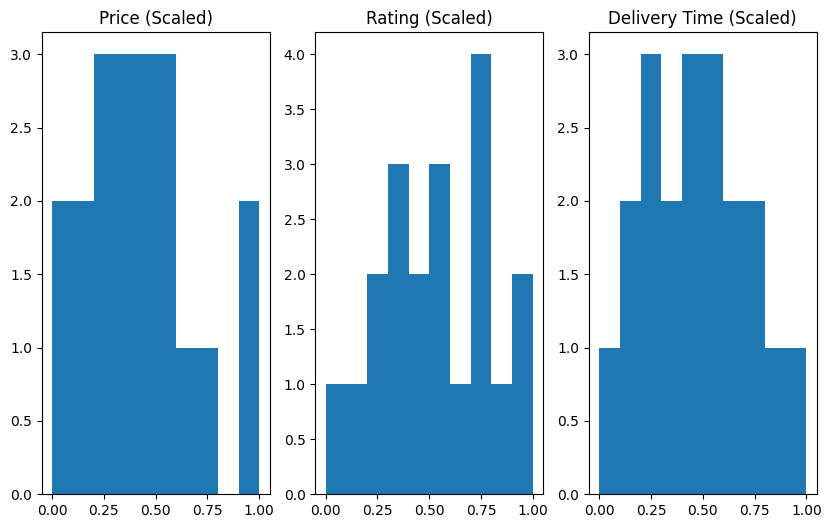

In [26]:
import matplotlib.pyplot as plt

# Visualize the scaled features
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.hist(df['price_scaled'])
plt.title('Price (Scaled)')

plt.subplot(132)
plt.hist(df['rating_scaled'])
plt.title('Rating (Scaled)')

plt.subplot(133)
plt.hist(df['delivery_time_scaled'])
plt.title('Delivery Time (Scaled)')

plt.show()

5. **The Result**: Our dataset now contains the original features and their corresponding scaled versions. We can use these scaled features in your recommendation system.

In [27]:
print(df[['food_item', 'price_scaled', 'rating_scaled', 'delivery_time_scaled']])

         food_item  price_scaled  rating_scaled  delivery_time_scaled
0            Pizza      0.500000       0.733333              0.555556
1           Burger      0.272727       0.266667              0.333333
2            Sushi      0.954545       0.533333              0.888889
3            Salad      0.363636       1.000000              0.222222
4            Pasta      0.590909       0.133333              0.666667
5             Taco      0.295455       0.466667              0.444444
6    Chicken Wings      0.409091       0.600000              0.555556
7            Steak      0.772727       0.800000              0.777778
8         Sandwich      0.227273       0.333333              0.222222
9       Sushi Roll      1.000000       0.866667              1.000000
10         Burrito      0.340909       0.400000              0.333333
11            Soup      0.181818       0.666667              0.111111
12        Pancakes      0.431818       0.733333              0.444444
13       Ice Cream  

This is how we can use Min-Max scaling to preprocess the data for building a recommendation system, making sure that all our features are on a common scale and can be used effectively for recommendation algorithms.

**Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.**

In [28]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the iris dataset as a pandas dataframe
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('datasets/stock_data.csv')
print("The Original Dataframe:")
print(df.head()) # Print the first five rows of the dataframe
print("Summary Statistics Of The Dataframe:")
print(df.describe()) # Print the summary statistics of the dataframe

The Original Dataframe:
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
Summary Statistics Of The Dataframe:
                open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.1

In [29]:
# Use SimpleImputer to fill missing values (replace 'strategy' and 'fill_value' as needed)
imputer = SimpleImputer(strategy='mean')  # We can choose 'mean', 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(df.iloc[:, 1:6])

# Standardize the imputed data
scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

# Apply PCA using the PCA class from sklearn.decomposition and fit it to the standardized data
pca = PCA() # Create an instance of the PCA class
pca.fit(X) # Fit the PCA model to the standardized data
print("Eigen Values Of The PCA Model:")
print(pca.explained_variance_) # Print the eigenvalues of the PCA model
print("Eigen Vectors Of The PCA Model:")
print(pca.components_) # Print the eigenvectors of the PCA model
print("Explained Variance Ratio Of The PCA Model:")
print(pca.explained_variance_ratio_) # Print the explained variance ratio of the PCA model

Eigen Values Of The PCA Model:
[4.02667546e+00 9.73065494e-01 1.47054375e-04 9.53741066e-05
 2.46946605e-05]
Eigen Vectors Of The PCA Model:
[[ 4.97786907e-01  4.97782865e-01  4.97803366e-01  4.97786104e-01
  -9.39213411e-02]
 [ 4.70217974e-02  4.74225265e-02  4.64768706e-02  4.69214646e-02
   9.95579395e-01]
 [-6.65249055e-01 -1.27262128e-01  5.92315181e-02  7.33307335e-01
   1.56238784e-04]
 [-6.14193742e-02  6.70931296e-01 -7.29225273e-01  1.19619949e-01
  -6.52727754e-04]
 [ 5.51061249e-01 -5.32558796e-01 -4.63415406e-01  4.44925601e-01
   4.95206987e-06]]
Explained Variance Ratio Of The PCA Model:
[8.05333791e-01 1.94612784e-01 2.94108276e-05 1.90747905e-05
 4.93892411e-06]


Number of Principal Components: 2


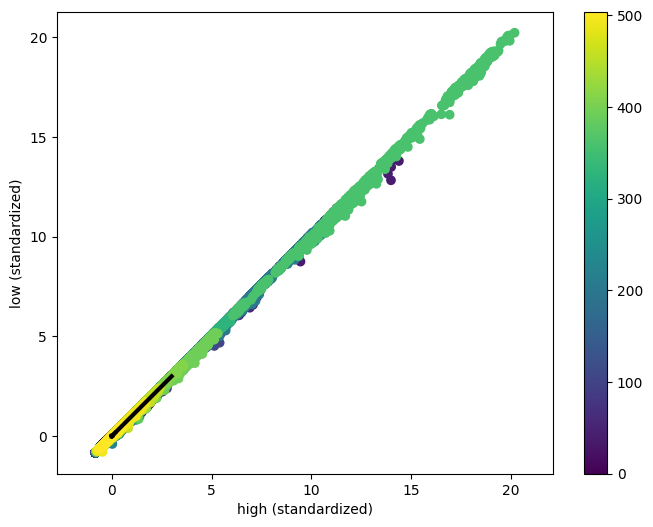

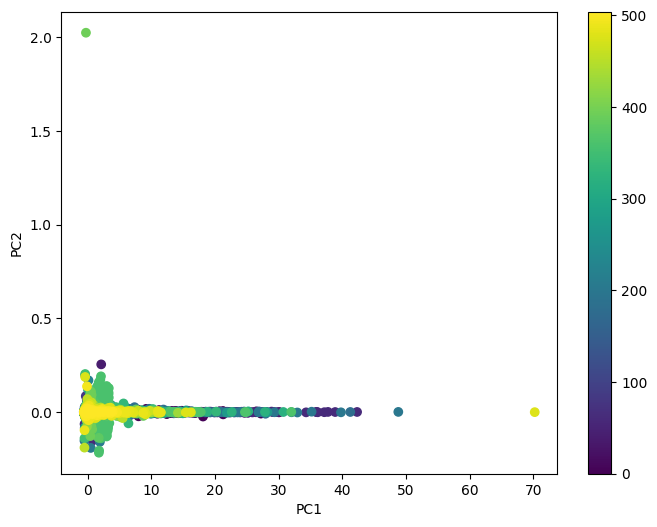

In [30]:
# Choose the number of principal components to keep based on the percentage of explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_) # Compute the cumulative sum of the explained variance ratio
d = np.argmax(cumsum >= 0.95) + 1 # Find the index where the cumulative sum is greater than or equal to 0.95, and add 1 to get the number of principal components
print("Number of Principal Components:", d) # Print the number of principal components
# Transform the data to the new coordinate system using the transform method of the PCA model
Z = pca.transform(X) # Transform the standardized data using the PCA model and store them in a numpy array
#print(Z) # Print the transformed data

# Convert the 'Name' column into numeric labels using LabelEncoder
label_encoder = LabelEncoder()
df['Name_Label'] = label_encoder.fit_transform(df['Name'])

# Plot the original data and the principal components as vectors on the same scatter plot, using the Name labels as colors
plt.figure(figsize=(8,6)) # Create another figure with a specified size
plt.scatter(X[:, 1], X[:, 2], c=df['Name_Label'], cmap='viridis') # Plot the first two columns of the original data as a scatter plot, using the Name Label as the color and the viridis colormap
plt.xlabel('high (standardized)') # Label the x-axis as sepal length (standardized)
plt.ylabel('low (standardized)') # Label the y-axis as sepal width (standardized)
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
for length, vector in zip(pca.explained_variance_, pca.components_): # Loop over the eigenvalues and eigenvectors of the PCA model
    v = vector * 3 * np.sqrt(length) # Scale the eigenvector by 3 times the square root of the eigenvalue
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3) # Plot the eigenvector as a black line with a specified width
plt.axis('equal') # Set the axis to be equal
plt.show() # Show the plot

# Plot the transformed data as a scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create a figure with a specified size
plt.scatter(Z[:, 1], Z[:, 4], c=df['Name_Label'], cmap='viridis') # Plot the first two columns of the transformed data as a scatter plot, using the Name Label as the color and the viridis colormap
plt.xlabel('PC1') # Label the x-axis as PC1
plt.ylabel('PC2') # Label the y-axis as PC2
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
plt.show() # Show the plot

**Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.**

`Min-Max scaling`, also known as feature scaling, transforms the values of a dataset into a specific range. Given a dataset with values $X$, the Min-Max scaling formula to scale the values to a new range $[a, b]$ can be expressed as:

$$X_{\text{scaled}} = a + \frac{(X - \min(X)) \cdot (b - a)}{\max(X) - \min(X)}
$$

Where:
- $X_{\text{scaled}}$ is the scaled value of a data point in the new range $[a, b]$.
- $X$ is the original value of the data point.
- $\min(X)$ is the minimum value in the dataset.
- $\max(X)$ is the maximum value in the dataset.
- $a$ is the minimum value of the new range (e.g., -1 in your case).
- $b$ is the maximum value of the new range (e.g., 1 in your case).

This formula rescales each data point in the original dataset to fit within the new range defined by $[a, b]$. It's a linear transformation that preserves the order of the data while ensuring that the minimum value maps to $a$ and the maximum value maps to $b$.

In our specific case, where we want to scale the data to the range of -1 to 1, the formula becomes:

$$X_{\text{scaled}} = -1 + \frac{(X - \min(X)) \cdot (1 - (-1))}{\max(X) - \min(X)}$$

This formula, when applied to each data point in the dataset, will scale the values to the range of -1 to 1.

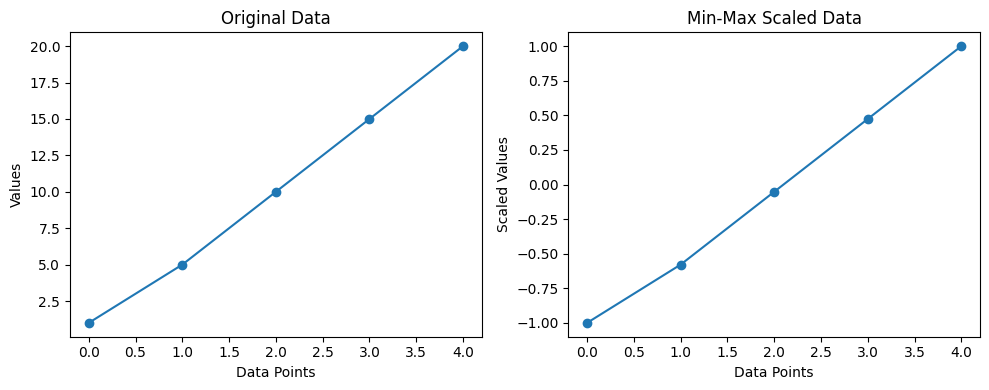

Original Data:  [ 1  5 10 15 20]
Scaled Data:  [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = np.array([1, 5, 10, 15, 20])

# Calculate the minimum and maximum values in the dataset
min_value = np.min(data)
max_value = np.max(data)

# Define the desired range for scaling (-1 to 1)
new_min = -1
new_max = 1

# Perform Min-Max scaling
scaled_data = (data - min_value) / (max_value - min_value) * (new_max - new_min) + new_min

# Visualize the original and scaled data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(data, marker='o', linestyle='-')
plt.title('Original Data')
plt.xlabel('Data Points')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
plt.plot(scaled_data, marker='o', linestyle='-')
plt.title('Min-Max Scaled Data')
plt.xlabel('Data Points')
plt.ylabel('Scaled Values')

plt.tight_layout()
plt.show()

print("Original Data: ", data)
print("Scaled Data: ", scaled_data)


**Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why ?**

In [32]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the iris dataset as a pandas dataframe
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('datasets/cardio_data.csv', sep=';')
# convert patient ages from days to years
df['age_in_years'] = df['age'] / 365.25
print("The Original Dataframe:")
print(df.head()) # Print the first five rows of the dataframe

# Select the desired columns from the original DataFrame
reduced_df = df[['id', 'age_in_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
# Print the first few rows of the new DataFrame
print("New DataFrame:")
print(reduced_df.head())
      
print("Summary Statistics Of The Reduced Dataframe:")
print(reduced_df.describe()) # Print the summary statistics of the dataframe

The Original Dataframe:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_in_years  
0     0       1       0     50.357290  
1     0       1       1     55.381246  
2     0       0       1     51.627652  
3     0       1       1     48.249144  
4     0       0       0     47.841205  
New DataFrame:
   id  age_in_years  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   0     50.357290       2     168    62.0    110     80            1     1   
1   1     55.381246       1     156    85.0    140     90            3     1   


let me explain each feature (column) in the dataset:

1. `id`: This is likely an identifier for each individual in the dataset. It's a unique identifier for each person and is typically used for tracking or referencing specific records.

2. `age`: This column represents the age of individuals. It's given in days. This is a common practice in medical datasets, as it allows for more precise calculations and avoids rounding. To convert these ages from days to years, we can divide each age value by 365.25 (approximately the average number of days in a year, accounting for leap years).

3. `gender`: This column represents the gender of individuals. It uses the values 1 and 2 to indicate male and female, respectively.

4. `height`: This column represents the height of individuals, typically in centimeters.

5. `weight`: This column represents the weight of individuals, typically in kilograms.

6. `ap_hi`: This column represents the systolic blood pressure. Systolic blood pressure is the higher of the two numbers in a blood pressure reading and represents the pressure in our arteries when the heart beats.

7. `ap_lo`: This column represents the diastolic blood pressure. Diastolic blood pressure is the lower of the two numbers in a blood pressure reading and represents the pressure in our arteries when the heart is at rest between beats.

8. `cholesterol`: This column indicates the cholesterol level of individuals. It can have values like 1, 2, or 3, which typically correspond to different cholesterol levels (e.g., normal, above normal, high).

9. `gluc`: This column represents the glucose level of individuals. It can also have values like 1, 2, or 3, which typically correspond to different glucose levels (e.g., normal, above normal, high).

10. `smoke`: This is a binary column, where 0 typically means the individual does not smoke, and 1 means the individual smokes.

11. `alco`: This is another binary column, where 0 typically means the individual does not consume alcohol, and 1 means the individual does consume alcohol.

12. `active`: This binary column is often used to represent the physical activity level of individuals. 0 might mean inactive, while 1 might mean active.

13. `cardio`: This is the target column and typically represents whether an individual has a cardiovascular disease. 0 often means no cardiovascular disease, while 1 indicates the presence of a cardiovascular disease.

These features are common in health-related datasets and are used for various types of analysis, including predicting the risk of cardiovascular diseases based on the given characteristics.

In [34]:
# Use SimpleImputer to fill missing values (replace 'strategy' and 'fill_value' as needed)
imputer = SimpleImputer(strategy='mean')  # We can choose 'mean', 'median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(reduced_df.iloc[:, 0:13])

# Standardize the imputed data
scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

# Apply PCA using the PCA class from sklearn.decomposition and fit it to the standardized data
pca = PCA() # Create an instance of the PCA class
pca.fit(X) # Fit the PCA model to the standardized data
print("Eigen Values Of The PCA Model:")
print(pca.explained_variance_) # Print the eigenvalues of the PCA model
print("Eigen Vectors Of The PCA Model:")
print(pca.components_) # Print the eigenvectors of the PCA model
print("Explained Variance Ratio Of The PCA Model:")
print(pca.explained_variance_ratio_) # Print the explained variance ratio of the PCA model

Eigen Values Of The PCA Model:
[1.94311538 1.73843731 1.16164548 1.054493   1.00216808 0.99777498
 0.98413867 0.97313458 0.82707949 0.72354623 0.62153672 0.52433777
 0.44877804]
Eigen Vectors Of The PCA Model:
[[ 0.00106347  0.04441619 -0.54812724 -0.51462835 -0.32822415 -0.02203318
  -0.03911068 -0.04676792 -0.04089326 -0.44733037 -0.33961287 -0.01401645
  -0.05913322]
 [ 0.00985604  0.3675655  -0.09582466 -0.08542519  0.25870503  0.07978338
   0.08602912  0.57156364  0.49594536 -0.08543564 -0.0324866  -0.03203716
   0.43080871]
 [-0.01261379  0.15612074  0.11908292  0.31749209  0.34745608  0.14696012
   0.15208174 -0.27067805 -0.31700609 -0.37496825 -0.48554502 -0.25286823
   0.28456355]
 [ 0.0259319   0.38052868 -0.06116098 -0.2741816  -0.16682497  0.31891207
   0.39207718 -0.1946082  -0.37998695  0.24677436  0.34199479  0.10601449
   0.34783578]
 [ 0.87801269 -0.08119164  0.02158356  0.06052114  0.03843051  0.24713638
   0.00394637  0.01943933  0.02883747 -0.07907021 -0.09514787  0

In [35]:
# Choose the number of principal components to keep based on the percentage of explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_) # Compute the cumulative sum of the explained variance ratio
d = np.argmax(cumsum >= 0.95) + 1 # Find the index where the cumulative sum is greater than or equal to 0.95, and add 1 to get the number of principal components
print("Number of Principal Components:", d) # Print the number of principal components
# Transform the data to the new coordinate system using the transform method of the PCA model
Z = pca.transform(X) # Transform the standardized data using the PCA model and store them in a numpy array
#print(Z) # Print the transformed data

Number of Principal Components: 12


PCA might give us many principal components, but we don't need all of them. We want to keep the most important ones. To decide how many to keep, we look at the cumulative explained variance.

The cumulative explained variance tells us how much of the total variance in the data is explained by the first \(d\) principal components. We want to keep enough principal components to explain a large portion of the variance, like 95%.

$$C_d = \frac{\sum_{i=1}^{d} \lambda_i}{\sum_{i=1}^{N} \lambda_i}$$

- $C_d$ is the cumulative explained variance for \(d\) components.
- $\lambda_i$ is the eigenvalue for each principal component.
- $N$ is the total number of eigenvalues.

We choose $d$ such that $C_d$ is at least 0.95, meaning we're retaining enough information. That means, we might decide to keep the first two principal components if they explain at least 95% of the variation in the data. 

This is like saying, "We're only going to pay attention to the most important features."

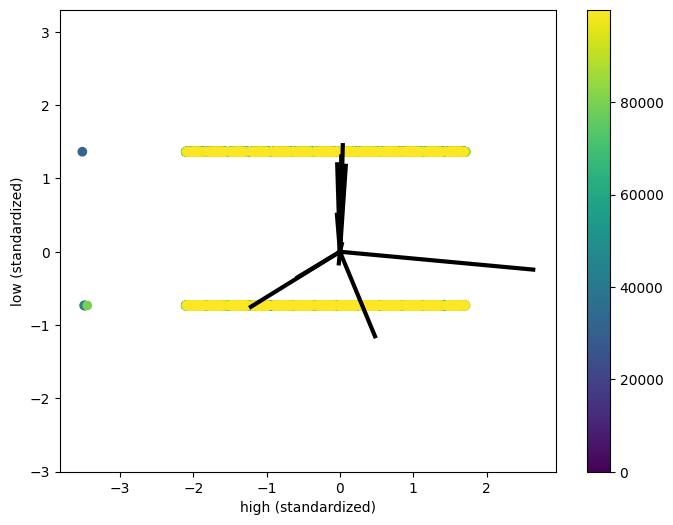

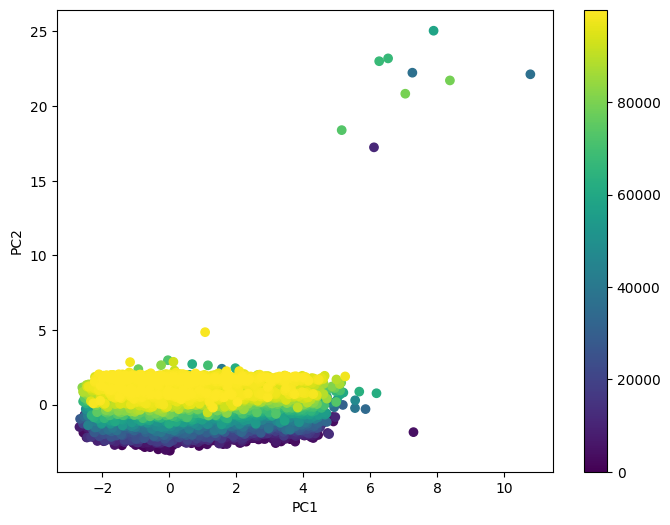

In [36]:
# Plot the original data and the principal components as vectors on the same scatter plot, using the Name labels as colors
plt.figure(figsize=(8,6)) # Create another figure with a specified size
plt.scatter(X[:, 1], X[:, 2], c=df['id'], cmap='viridis') # Plot the first two columns of the original data as a scatter plot, using the Name Label as the color and the viridis colormap
plt.xlabel('high (standardized)') # Label the x-axis as sepal length (standardized)
plt.ylabel('low (standardized)') # Label the y-axis as sepal width (standardized)
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
for length, vector in zip(pca.explained_variance_, pca.components_): # Loop over the eigenvalues and eigenvectors of the PCA model
    v = vector * 3 * np.sqrt(length) # Scale the eigenvector by 3 times the square root of the eigenvalue
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3) # Plot the eigenvector as a black line with a specified width
plt.axis('equal') # Set the axis to be equal
plt.show() # Show the plot

# Plot the transformed data as a scatter plot, using the species labels as colors
plt.figure(figsize=(8,6)) # Create a figure with a specified size
plt.scatter(Z[:, 1], Z[:, 4], c=df['id'], cmap='viridis') # Plot the first two columns of the transformed data as a scatter plot, using the Name Label as the color and the viridis colormap
plt.xlabel('PC1') # Label the x-axis as PC1
plt.ylabel('PC2') # Label the y-axis as PC2
plt.colorbar() # Add a colorbar to show the mapping of colors to labels
plt.show() # Show the plot